In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
from pathlib import Path
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import requests
import json
%matplotlib inline
import hvplot.pandas
import plotly.express as px

In [2]:
# Set environment variables from the .env file
from dotenv import load_dotenv
load_dotenv()

True

In [27]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [288]:
ticker= ['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'JNJ', 'BRK.B', 'JPM', 'V',
'PG', 'UNH', 'INTC', 'HD', 'MA', 'VZ', 'T', 'DIS', 'BAC', 'NVDA',
'XOM', 'MRK', 'PFE', 'CSCO', 'CMCSA', 'ADBE', 'KO', 'PEP', 'CVX', 'NFLX',
'PYPL', 'WMT', 'ABBV', 'ABT', 'CRM', 'MCD', 'BMY', 'TMO', 'COST' ,'AMGN',
'MDT', 'ACN', 'LLY', 'NKE', 'NEE', 'AVGO', 'UNP', 'C', 'TXN', 'PM']

timeframe = "1D"

# Set start and end datetimes 
start_date = pd.Timestamp('2007-12-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-3-31', tz='America/New_York').isoformat()


df_stock = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df_stock = df_stock.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [ ]:
df_stock3

In [289]:
df_stock['date']= df_stock.index.date
df_stock.reset_index()
df_stock.set_index('date',inplace=True)


In [290]:
df_stock.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,BMY,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,27.847,NaN,26.773,36.05,41.71,46.60,96.21,NaN,40.57,26.10,...,NaN,41.03,55.81,32.36,56.73,31.030,NaN,43.19,46.90,93.56
2008-01-03,27.836,NaN,26.624,35.49,41.78,39.10,95.18,NaN,40.31,26.12,...,NaN,41.37,57.05,31.64,56.92,30.938,NaN,43.45,46.39,93.91
2008-01-04,25.704,NaN,26.734,34.87,40.25,38.34,88.74,NaN,39.85,25.72,...,NaN,40.90,55.98,30.51,55.98,29.993,NaN,42.54,45.64,92.00
2008-01-07,25.369,NaN,27.593,33.89,40.25,45.38,88.84,NaN,39.86,26.08,...,NaN,41.37,56.85,30.51,56.93,29.728,NaN,43.38,46.58,91.24
2008-01-08,24.461,NaN,28.265,33.95,39.24,39.65,87.92,NaN,38.36,26.65,...,NaN,39.03,56.86,30.43,56.07,28.723,NaN,41.61,45.91,89.99


In [293]:
#mpsl
#d_list
mpran = len(mpsl)
dran = len(dlist2)
r_list = []
for i in range(mpran):
    stock = mpsl[i]
    for j in range(dran):
        date = dlist2[j]
        newdf = ds3[ds3['date']==date]
        if len(newdf)<1:
            r_list.append(np.nan)
        else:
            r_list.append(newdf.iloc[0,i+1])
            

In [294]:
ds3[ds3['date']=='2008-09-25']

,date,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,...,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM,Date+30,Date+1


In [223]:
def next_trading_day(start_day, num_trading_days, direction):
    '''returns the next/previous trading day. Business_days determines how many days
    back or into the future, direction determines wether back (-1) or forward (1)'''
    if direction <0:
        num_trading_days = num_trading_days * (-1)
    for i in range(0, num_trading_days, direction):
        next_day = start_day +datetime.timedelta(days=direction)
        while next_day.weekday() in [5,6] or next_day not in trading_days :
            next_day +=  datetime.timedelta(days=direction)
        start_day = next_day
    return start_day

In [287]:
#ds3['date'] = pd.to_datetime(ds3['date']).dt.date


In [264]:
ds3.reset_index(inplace=True)

In [229]:
from datetime import date
import datetime
import pandas_market_calendars as mcal
trading_days = mcal.get_calendar('NYSE').valid_days(start_date='2000-12-20', end_date=date.today()+ datetime.timedelta(days=300))

In [230]:
import datetime
ds3['Date+30']  = ds3['date'].apply(next_trading_day, args=[30,1,])

In [265]:
ds3['Date+1']  = ds3['date'].apply(next_trading_day, args=[1,1,])

In [266]:
ds3[['Date+1','date']].head()

,Date+1,date
0,2008-01-03,2008-01-02
1,2008-01-04,2008-01-03
2,2008-01-07,2008-01-04
3,2008-01-08,2008-01-07
4,2008-01-09,2008-01-08


In [270]:
ds3.drop(columns=['Date+30','Date+1']).head()

,date,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
0,2008-01-02,27.847,NaN,26.773,36.05,41.71,46.60,96.21,NaN,40.57,...,NaN,41.03,55.81,32.36,56.73,31.030,NaN,43.19,46.90,93.56
1,2008-01-03,27.836,NaN,26.624,35.49,41.78,39.10,95.18,NaN,40.31,...,NaN,41.37,57.05,31.64,56.92,30.938,NaN,43.45,46.39,93.91
2,2008-01-04,25.704,NaN,26.734,34.87,40.25,38.34,88.74,NaN,39.85,...,NaN,40.90,55.98,30.51,55.98,29.993,NaN,42.54,45.64,92.00
3,2008-01-07,25.369,NaN,27.593,33.89,40.25,45.38,88.84,NaN,39.86,...,NaN,41.37,56.85,30.51,56.93,29.728,NaN,43.38,46.58,91.24
4,2008-01-08,24.461,NaN,28.265,33.95,39.24,39.65,87.92,NaN,38.36,...,NaN,39.03,56.86,30.43,56.07,28.723,NaN,41.61,45.91,89.99


In [291]:
#tst = int(d_list[0][8:10])
dlist2=[]
for z in range(dran):
    ro = int(d_list[z][8:10])
    new = ro-2
    fullstr = d_list[z][0:8]+str(new)
    dlist2.append(fullstr)

In [292]:
r_list[100:200]

[nan,
 nan,
 8.086,
 nan,
 nan,
 nan,
 nan,
 nan,
 113.92,
 nan,
 nan,
 112.46,
 108.74,
 107.68,
 93.59,
 113.95,
 116.73,
 144.16,
 145.83,
 153.26,
 169.3,
 167.91,
 185.51,
 225.76,
 nan,
 189.94,
 197.92,
 nan,
 nan,
 nan,
 19.403,
 nan,
 nan,
 29.234,
 nan,
 nan,
 nan,
 nan,
 nan,
 55.699,
 53.717,
 75.11399999999999,
 11.68,
 96.208,
 11.894,
 9.166,
 9.081,
 10.031,
 nan,
 10.559000000000001,
 90.75399999999999,
 102.5,
 118.93,
 130.41,
 130.32,
 nan,
 nan,
 nan,
 nan,
 106.82,
 111.58,
 nan,
 nan,
 162.92,
 173.0,
 178.98,
 187.86,
 222.98,
 180.96,
 174.35,
 177.35,
 209.1,
 nan,
 273.04,
 nan,
 17.557000000000002,
 nan,
 24.964000000000002,
 13.585999999999999,
 13.01,
 18.994,
 23.916,
 29.160999999999998,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 96.208,
 11.894,
 nan,
 9.081,
 70.1,
 77.997,
 10.559000000000001]

In [200]:
dlist2[0:5]

['2007-12-27', '2008-03-27', '2008-06-26', '2008-09-25', '2008-12-25']

In [174]:
main_portfolio_1.head()

free_cash_flow  earnings_yield  bookValuePerShare  \
stock date                                                            
AAPL  2007-12-29        0.157580        0.097204          19.185715   
      2008-03-29        0.047823        0.048379          20.568438   
      2008-06-28        0.052403        0.055237          22.303988   
      2008-09-27        0.335467        0.097916          23.854572   
      2008-12-27        0.315981        0.140914          25.765288   

                      Sector  
stock date                    
AAPL  2007-12-29  Technology  
      2008-03-29  Technology  
      2008-06-28  Technology  
      2008-09-27  Technology  
      2008-12-27  Technology

In [275]:
#df_stock['AAPL']['close']
#df_stock.loc[d_list[3]]

In [273]:
#d_list2=[datetime.strptime(date,'"%Y-%m-%d"').date() for date in d_list]

In [49]:
df_stock2 = df_stock.reset_index(col_level=1)

In [274]:
#d_list2 = df_stock2['date']

In [295]:
df_stock.to_csv('closelist.csv')

In [296]:
ds3 = pd.read_csv(r'C:\Users\zhaoy\Documents\github_files\Financial_Analysis\PROJECT-1\closelist2.csv')
ds3.head()

,date,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
0,1/2/2008,27.847,NaN,26.773,36.05,41.71,46.60,96.21,NaN,40.57,...,NaN,41.03,55.81,32.36,56.73,31.030,NaN,43.19,46.90,93.56
1,1/3/2008,27.836,NaN,26.624,35.49,41.78,39.10,95.18,NaN,40.31,...,NaN,41.37,57.05,31.64,56.92,30.938,NaN,43.45,46.39,93.91
2,1/4/2008,25.704,NaN,26.734,34.87,40.25,38.34,88.74,NaN,39.85,...,NaN,40.90,55.98,30.51,55.98,29.993,NaN,42.54,45.64,92.00
3,1/7/2008,25.369,NaN,27.593,33.89,40.25,45.38,88.84,NaN,39.86,...,NaN,41.37,56.85,30.51,56.93,29.728,NaN,43.38,46.58,91.24
4,1/8/2008,24.461,NaN,28.265,33.95,39.24,39.65,87.92,NaN,38.36,...,NaN,39.03,56.86,30.43,56.07,28.723,NaN,41.61,45.91,89.99


In [301]:
ds4=ds3.set_index('date')
ds4.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,BMY,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1/2/2008,27.847,NaN,26.773,36.05,41.71,46.60,96.21,NaN,40.57,26.10,...,NaN,41.03,55.81,32.36,56.73,31.030,NaN,43.19,46.90,93.56
1/3/2008,27.836,NaN,26.624,35.49,41.78,39.10,95.18,NaN,40.31,26.12,...,NaN,41.37,57.05,31.64,56.92,30.938,NaN,43.45,46.39,93.91
1/4/2008,25.704,NaN,26.734,34.87,40.25,38.34,88.74,NaN,39.85,25.72,...,NaN,40.90,55.98,30.51,55.98,29.993,NaN,42.54,45.64,92.00
1/7/2008,25.369,NaN,27.593,33.89,40.25,45.38,88.84,NaN,39.86,26.08,...,NaN,41.37,56.85,30.51,56.93,29.728,NaN,43.38,46.58,91.24
1/8/2008,24.461,NaN,28.265,33.95,39.24,39.65,87.92,NaN,38.36,26.65,...,NaN,39.03,56.86,30.43,56.07,28.723,NaN,41.61,45.91,89.99


In [310]:
daily_return=ds4.pct_change()
daily_return.head(60)

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,BMY,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1/2/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/2008,-0.000395,NaN,-0.005565,-0.015534,0.001678,-0.160944,-0.010706,NaN,-0.006409,0.000766,...,NaN,0.008287,0.022218,-0.022250,0.003349,-0.002965,NaN,0.006020,-0.010874,0.003741
1/4/2008,-0.076591,NaN,0.004132,-0.017470,-0.036620,-0.019437,-0.067661,NaN,-0.011412,-0.015314,...,NaN,-0.011361,-0.018755,-0.035714,-0.016514,-0.030545,NaN,-0.020944,-0.016167,-0.020339
1/7/2008,-0.013033,NaN,0.032131,-0.028104,0.000000,0.183620,0.001127,NaN,0.000251,0.013997,...,NaN,0.011491,0.015541,0.000000,0.016970,-0.008835,NaN,0.019746,0.020596,-0.008261
1/8/2008,-0.035792,NaN,0.024354,0.001770,-0.025093,-0.126267,-0.010356,NaN,-0.037632,0.021856,...,NaN,-0.056563,0.000176,-0.002622,-0.015106,-0.033807,NaN,-0.040802,-0.014384,-0.013700
1/9/2008,0.048322,NaN,0.018503,-0.005007,0.005607,0.028499,-0.032188,NaN,0.010167,0.016135,...,NaN,-0.001025,-0.025853,0.001643,0.003745,-0.004456,NaN,0.021629,0.022217,0.018335
1/10/2008,-0.008267,NaN,0.001320,-0.003552,-0.006082,-0.001962,-0.009519,NaN,0.014194,-0.006278,...,NaN,0.010259,0.011013,-0.003281,-0.004087,0.021682,NaN,0.021642,0.031110,-0.000218
1/11/2008,-0.031536,NaN,-0.629813,-0.025550,-0.029832,0.001229,-0.037257,NaN,-0.022137,-0.014493,...,NaN,-0.030465,-0.016964,-0.016129,-0.002498,-0.021975,NaN,-0.021414,-0.013019,-0.014407
1/14/2008,0.036745,NaN,1.695530,0.021341,0.011301,0.176196,0.021321,NaN,0.020557,0.018477,...,NaN,0.007855,0.009446,0.016059,-0.010016,0.009344,NaN,0.010824,-0.001675,0.005094


In [318]:
monthly_return = daily_return.asfreq('M').ffill()
monthly_return.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,BMY,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
quarter_return1=daily_return.head(60)
quarter_return1

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,AVGO,BAC,BMY,...,PYPL,T,TMO,TXN,UNH,UNP,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1/2/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/2008,-0.000395,NaN,-0.005565,-0.015534,0.001678,-0.160944,-0.010706,NaN,-0.006409,0.000766,...,NaN,0.008287,0.022218,-0.022250,0.003349,-0.002965,NaN,0.006020,-0.010874,0.003741
1/4/2008,-0.076591,NaN,0.004132,-0.017470,-0.036620,-0.019437,-0.067661,NaN,-0.011412,-0.015314,...,NaN,-0.011361,-0.018755,-0.035714,-0.016514,-0.030545,NaN,-0.020944,-0.016167,-0.020339
1/7/2008,-0.013033,NaN,0.032131,-0.028104,0.000000,0.183620,0.001127,NaN,0.000251,0.013997,...,NaN,0.011491,0.015541,0.000000,0.016970,-0.008835,NaN,0.019746,0.020596,-0.008261
1/8/2008,-0.035792,NaN,0.024354,0.001770,-0.025093,-0.126267,-0.010356,NaN,-0.037632,0.021856,...,NaN,-0.056563,0.000176,-0.002622,-0.015106,-0.033807,NaN,-0.040802,-0.014384,-0.013700
1/9/2008,0.048322,NaN,0.018503,-0.005007,0.005607,0.028499,-0.032188,NaN,0.010167,0.016135,...,NaN,-0.001025,-0.025853,0.001643,0.003745,-0.004456,NaN,0.021629,0.022217,0.018335
1/10/2008,-0.008267,NaN,0.001320,-0.003552,-0.006082,-0.001962,-0.009519,NaN,0.014194,-0.006278,...,NaN,0.010259,0.011013,-0.003281,-0.004087,0.021682,NaN,0.021642,0.031110,-0.000218
1/11/2008,-0.031536,NaN,-0.629813,-0.025550,-0.029832,0.001229,-0.037257,NaN,-0.022137,-0.014493,...,NaN,-0.030465,-0.016964,-0.016129,-0.002498,-0.021975,NaN,-0.021414,-0.013019,-0.014407
1/14/2008,0.036745,NaN,1.695530,0.021341,0.011301,0.176196,0.021321,NaN,0.020557,0.018477,...,NaN,0.007855,0.009446,0.016059,-0.010016,0.009344,NaN,0.010824,-0.001675,0.005094


In [303]:
daily_return.isnull().sum()

AAPL        1
ABBV     1260
ABT         1
ACN         1
ADBE        1
AMGN        1
AMZN        1
AVGO      403
BAC         1
BMY         1
BRK.B       1
C           1
CMCSA       1
COST        1
CRM         1
CSCO        1
CVX         1
DIS         1
FB       1105
GOOG        1
GOOGL       1
HD          1
INTC        1
JNJ         1
JPM         1
KO          1
LLY         1
MA          1
MCD         1
MDT         1
MRK         1
MSFT        1
NEE         1
NFLX        1
NKE         1
NVDA        1
PEP         1
PFE         1
PG          1
PM         61
PYPL     1890
T           1
TMO         1
TXN         1
UNH         1
UNP         1
V          54
VZ          1
WMT         1
XOM         1
dtype: int64

In [84]:
df_stock2.columns

MultiIndex(levels=[['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AMGN', 'AMZN', 'AVGO', 'BAC', 'BMY', 'BRKB', 'C', 'CMCSA', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'FB', 'GOOG', 'GOOGL', 'HD', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY', 'MA', 'MCD', 'MDT', 'MRK', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'T', 'TMO', 'TXN', 'UNH', 'UNP', 'V', 'VZ', 'WMT', 'XOM', 'date', ''], ['close', 'high', 'low', 'open', 'volume', '', 'date']],
           codes=[[51, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

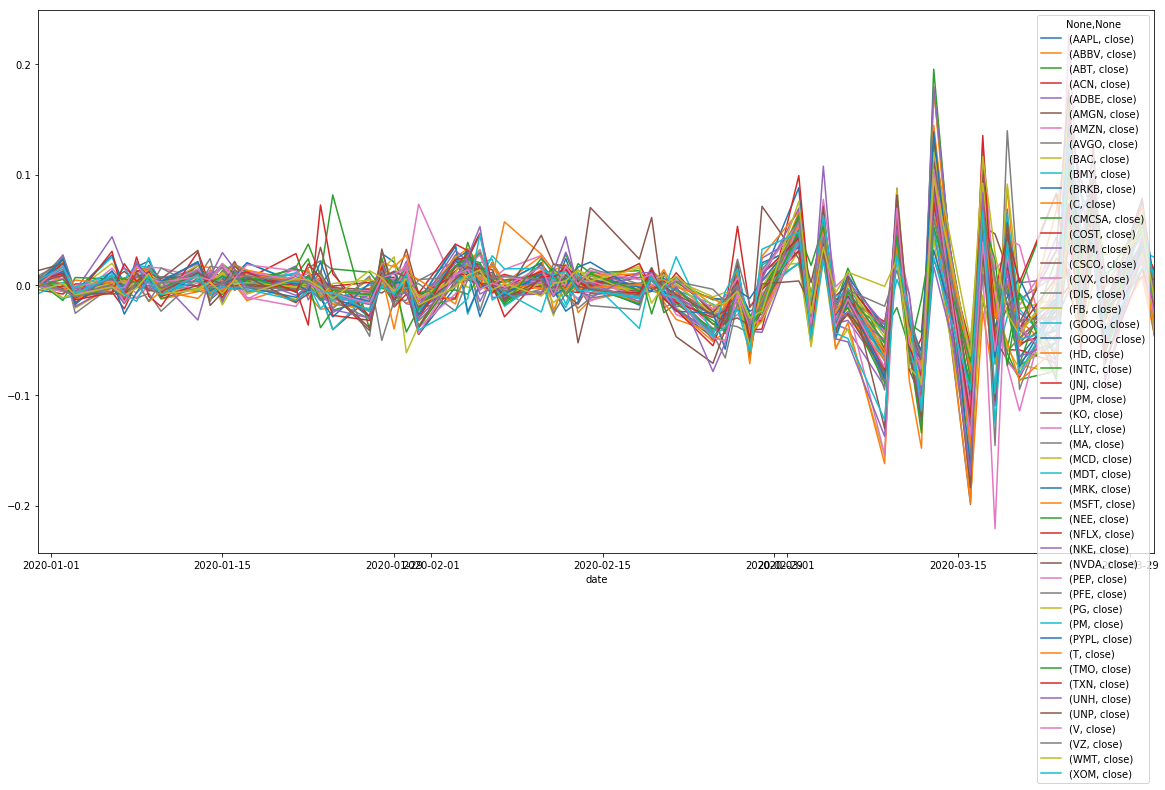

In [67]:
daily_returns = df_stock.pct_change()
daily_returns.tail(63).plot.line(figsize=(20,10))

In [304]:
#df_stock.index

In [305]:
#df_stock.columns

In [3]:
# Set Financial Model Prep API key
fmp_api_key = os.getenv('FINMODELPREP_API_KEY')

# Create parameterized url
request_url = "https://financialmodelingprep.com/api/v3/key-metrics/ACN?period=quarter&apikey=fmp_api_key"
# Submit request and format output
response_data = requests.get(request_url).json()
#print(json.dumps(response_data, indent=4))

In [4]:
top_50_stocks= ['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'JNJ', 'BRKB', 'JPM', 'V',
'PG', 'UNH', 'INTC', 'HD', 'MA', 'VZ', 'T', 'DIS', 'BAC', 'NVDA',
'XOM', 'MRK', 'PFE', 'CSCO', 'CMCSA', 'ADBE', 'KO', 'PEP', 'CVX', 'NFLX',
'PYPL', 'WMT', 'ABBV', 'ABT', 'CRM', 'MCD', 'BMY', 'TMO', 'COST' ,'AMGN',
'MDT', 'ACN', 'LLY', 'NKE', 'NEE', 'AVGO', 'UNP', 'C', 'TXN', 'PM']


fcf_dfs = []

#Get all prices into a dataframe
for stock in top_50_stocks:
    r = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{stock}?period=quarter&apikey=' + fmp_api_key).json()
    i = len(r) if len(r)< 50 else 50
    for x in range(i): 
        free_cash_flow = r[x]['freeCashFlowYield']
        print(f'{stock} Free Cash Flow: {free_cash_flow}')
        #print(free_cash_flow)
        df = pd.DataFrame([[r[x]['date'], stock, free_cash_flow]], columns=['date', 'stock', 'free_cash_flow'])
        fcf_dfs.append(df)
    #free_cash_flow = pd.DataFrame(free_cash_flow) 
  
    #empresas[stock] = free_cash_flow.set_index('date')
    #empresas[stock] = empresas[stock]['close']

    #portfolio = pd.concat(empresas, axis=1)
#return_stocks = portfolio.pct_change()
#return_stocks

MSFT Free Cash Flow: 0.010060780752766263
MSFT Free Cash Flow: 0.0054136456222567955
MSFT Free Cash Flow: 0.009450585719819854
MSFT Free Cash Flow: 0.011195967928663753
MSFT Free Cash Flow: 0.010923568523929245
MSFT Free Cash Flow: 0.006353711679795836
MSFT Free Cash Flow: 0.012633174610990254
MSFT Free Cash Flow: 0.009167448286742203
MSFT Free Cash Flow: 0.012789574164488494
MSFT Free Cash Flow: 0.007397899544832656
MSFT Free Cash Flow: 0.015941255021541728
MSFT Free Cash Flow: 0.015416217365766142
MSFT Free Cash Flow: 0.016884009921658196
MSFT Free Cash Flow: 0.00850470562102368
MSFT Free Cash Flow: 0.02012748853311074
MSFT Free Cash Flow: 0.012932195579143746
MSFT Free Cash Flow: 0.021083489103863203
MSFT Free Cash Flow: 0.008129781706034919
MSFT Free Cash Flow: 0.017196098049024514
MSFT Free Cash Flow: 0.01313463093226193
MSFT Free Cash Flow: 0.020469115385847454
MSFT Free Cash Flow: 0.008563310810323566
MSFT Free Cash Flow: 0.0186170692357801
MSFT Free Cash Flow: 0.022628336594405

In [5]:
portfolio = pd.concat(fcf_dfs)

In [6]:
portfolio.set_index(['stock', 'date'], inplace=True)


In [7]:
portfolio.tail()

free_cash_flow
stock date                      
PM    2009-06-30        0.033014
      2009-03-31        0.019229
      2008-12-31        0.009402
      2008-09-30        0.021717
      2008-06-30        0.030205

In [8]:
ey_df = []

for stock in top_50_stocks:
    r = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{stock}?period=quarter&apikey=' + fmp_api_key).json()
    i = len(r) if len(r)< 50 else 50
    for x in range(i): 
        earnings_yield = r[x]['earningsYield']
        print(f'{stock} Earnings Yield: {earnings_yield}')
        #print(free_cash_flow)
        df_2 = pd.DataFrame([[r[x]['date'], stock, earnings_yield]], columns=['date', 'stock', 'earnings_yield'])
        ey_df.append(df_2)

MSFT Earnings Yield: 0.007874609787707858
MSFT Earnings Yield: 0.008838620582154086
MSFT Earnings Yield: 0.009672515510038953
MSFT Earnings Yield: 0.012245270720352404
MSFT Earnings Yield: 0.00878372570764881
MSFT Earnings Yield: 0.010301993518944914
MSFT Earnings Yield: 0.011086537321469718
MSFT Earnings Yield: 0.010936107642950199
MSFT Earnings Yield: 0.010301594726826796
MSFT Earnings Yield: -0.008814816209403555
MSFT Earnings Yield: 0.01016974127101847
MSFT Earnings Yield: 0.011511789005186296
MSFT Earnings Yield: 0.009041844019395538
MSFT Earnings Yield: 0.010272815151991438
MSFT Earnings Yield: 0.010057311018569078
MSFT Earnings Yield: 0.006950303769682695
MSFT Earnings Yield: 0.010232842815868544
MSFT Earnings Yield: 0.011368956062328628
MSFT Earnings Yield: 0.010976232797249689
MSFT Earnings Yield: -0.008334686361187064
MSFT Earnings Yield: 0.012475674312073548
MSFT Earnings Yield: 0.017616382905588448
MSFT Earnings Yield: 0.011951568768444805
MSFT Earnings Yield: 0.01275194139

In [9]:
portfolio_2 = pd.concat(ey_df)
portfolio_2.set_index(['stock', 'date'], inplace=True)


In [10]:
portfolio_2.head(20)

earnings_yield
stock date                      
MSFT  2020-03-31        0.007875
      2019-12-31        0.008839
      2019-09-30        0.009673
      2019-06-30        0.012245
      2019-03-31        0.008784
      2018-12-31        0.010302
      2018-09-30        0.011087
      2018-06-30        0.010936
      2018-03-31        0.010302
      2017-12-31       -0.008815
      2017-09-30        0.010170
      2017-06-30        0.011512
      2017-03-31        0.009042
      2016-12-31        0.010273
      2016-09-30        0.010057
      2016-06-30        0.006950
      2016-03-31        0.010233
      2015-12-31        0.011369
      2015-09-30        0.010976
      2015-06-30       -0.008335

In [11]:
bv_df = []

for stock in top_50_stocks:
    r = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{stock}?period=quarter&apikey=' + fmp_api_key).json()
    i = len(r) if len(r)< 50 else 50
    for x in range(i): 
        book_Value_Per_Share = r[x]['bookValuePerShare']
        print(f'{stock} Book Value per share: {book_Value_Per_Share}')
        #print(free_cash_flow)
        df_3 = pd.DataFrame([[r[x]['date'], stock, book_Value_Per_Share]], columns=['date', 'stock', 'bookValuePerShare'])
        bv_df.append(df_3)

MSFT Book Value per share: 15.028350177188607
MSFT Book Value per share: 14.43484530676455
MSFT Book Value per share: 13.89324076499869
MSFT Book Value per share: 13.336374299491725
MSFT Book Value per share: 12.353691886964448
MSFT Book Value per share: 11.991149290641676
MSFT Book Value per share: 11.203831617359572
MSFT Book Value per share: 10.742597402597402
MSFT Book Value per share: 10.282766675317934
MSFT Book Value per share: 10.164742508756
MSFT Book Value per share: 11.630384016606124
MSFT Book Value per share: 9.345985024528789
MSFT Book Value per share: 8.99033006704487
MSFT Book Value per share: 8.85344827586207
MSFT Book Value per share: 9.03479265631018
MSFT Book Value per share: 9.084794952681388
MSFT Book Value per share: 9.407193158953723
MSFT Book Value per share: 9.62155388471178
MSFT Book Value per share: 9.685467733866933
MSFT Book Value per share: 9.793689617219028
MSFT Book Value per share: 10.971637248934876
MSFT Book Value per share: 11.153071133770332
MSFT B

In [12]:
portfolio_3 = pd.concat(bv_df)
portfolio_3.set_index(['stock', 'date'], inplace=True)

In [13]:
portfolio_3.tail()

bookValuePerShare
stock date                         
PM    2009-06-30           3.133208
      2009-03-31           2.880976
      2008-12-31           3.493007
      2008-09-30           5.397726
      2008-06-30           6.357903

In [14]:
main_portfolio = pd.concat([portfolio, portfolio_2, portfolio_3], axis=1, join='inner')

In [15]:
main_portfolio = main_portfolio.sort_index(ascending=True)
main_portfolio

free_cash_flow  earnings_yield  bookValuePerShare
stock date                                                         
AAPL  2007-12-29        0.157580        0.097204          19.185715
      2008-03-29        0.047823        0.048379          20.568438
      2008-06-28        0.052403        0.055237          22.303988
      2008-09-27        0.335467        0.097916          23.854572
      2008-12-27        0.315981        0.140914          25.765288
      2009-03-28        0.046713        0.075965          27.310790
      2009-06-27        0.099103        0.060176          28.989402
      2009-09-26        0.102613        0.064448          31.166295
      2009-12-26        0.205749        0.128588          39.498865
      2010-03-27        0.213088        0.185065          43.452286
      2010-06-26        0.124169        0.096748          47.491523
      2010-09-25        0.121369        0.107363          52.548707
      2010-12-25        0.192016        0.135472          59.465198
      2011-03-26        0.119742        0.128868          66.732520
      2011-06-25        0.193104        0.139090          75.134600
      2011-09-24        0.109333        0.123611          82.893521
      2011-12-31        0.267604        0.216805          96.723990
      2012-03-31        0.160301        0.149424         109.945134
      2012-06-30        0.091051        0.111187         119.684429
      2012-09-29        0.069856        0.101940         126.452422
      2012-12-29        0.347578        0.216757         135.630876
      2013-03-30        0.176807        0.165407         144.249861
      2013-06-29        0.097443        0.115685         132.299000
      2013-09-28        0.108526        0.107241         133.518708
      2013-12-28        0.292704        0.185505         144.724977
      2014-03-29        0.160383        0.136043         135.731832
      2014-06-28        0.012877        0.012752          19.709437
      2014-09-27        0.014692        0.013237          18.329748
      2014-12-27        0.046087        0.027274          21.106669
      2015-03-28        0.021514        0.017581          22.171919
...                          ...             ...                ...
XOM   2012-12-31        0.052188        0.106954          35.839023
      2013-03-31        0.015279        0.023802          37.235452
      2013-06-30       -0.002314        0.016400          37.148912
      2013-09-30        0.010994        0.019968          38.135421
      2013-12-31        0.004290        0.020104          39.376103
      2014-03-31        0.017542        0.020531          40.757394
      2014-06-30        0.003729        0.019721          42.011827
      2014-09-30        0.010344        0.019884          42.026297
      2014-12-31       -0.003924        0.017551          40.728398
      2015-03-31        0.003137        0.013427          40.661838
      2015-06-30        0.004822        0.012004          41.062545
      2015-09-30        0.007978        0.012198          40.638657
      2015-12-31       -0.005376        0.008510          40.708055
      2016-03-31        0.000571        0.004901          41.212781
      2016-06-30        0.000667        0.004574          40.830780
      2016-09-30        0.005508        0.007481          40.832216
      2016-12-31        0.009900        0.004740          40.058655
      2017-03-31        0.015322        0.011630          41.949088
      2017-06-30        0.011394        0.009916          42.219133
      2017-09-30        0.007382        0.011176          42.868297
      2017-12-31        0.007879        0.022689          44.099624
      2018-03-31        0.015573        0.014006          44.073770
      2018-06-30        0.008174        0.011317          43.845902
      2018-09-30        0.017547        0.018546          44.571529
      2018-12-31        0.008141        0.019438          44.916628
      2019-03-31        0.009157        0.006855          44.782670
      

In [16]:
# Sectors

information_technology = ['MSFT','AAPL', 'CSCO', 'V', 'INTC', 'NVDA', 'ADBE', 'PYPL', 'ACN', 'AVGO', 'TXN', 'CRM']
health_care = ['JNJ', 'UNH', 'PFE', 'MRK', 'ABT', 'ABBV', 'TMO', 'BMY', 'AMGN', 'MDT', 'LLY']
financials = ['BRKB', 'JPM', 'BAC', 'C', 'MA']
consumer_discretionary = ['AMZN','HD', 'MCD', 'NKE',] 
communication_services =['FB', 'GOOGL', 'NFLX', 'GOOG', 'VZ', 'T', 'DIS', 'CMCSA']
industrials =[ 'UNP']
consumer_staples =['PG', 'KO', 'PEP', 'WMT', 'COST', 'PM']
energy =['XOM', 'CVX']
utilities=['NEE']
real_estate=[]
materials=[]                

In [17]:
master = {}
def sectors(sector_list,sector_name):
    for stock in sector_list:
        master[stock] = sector_name
        
sectors(information_technology,'Technology')
sectors(health_care,'Healthcare')
sectors(financials,'Financials')
sectors(consumer_discretionary,'Consumer_Discretionary')
sectors(communication_services,'Communication_Services')
sectors(industrials,'Industrials')
sectors(consumer_staples,'Consumer_Staples')
sectors(energy,'Energy')
sectors(utilities,'Utilities')
sectors(real_estate,'Real Estate')
sectors(materials,'Materials')


In [18]:
master

{'MSFT': 'Technology',
 'AAPL': 'Technology',
 'CSCO': 'Technology',
 'V': 'Technology',
 'INTC': 'Technology',
 'NVDA': 'Technology',
 'ADBE': 'Technology',
 'PYPL': 'Technology',
 'ACN': 'Technology',
 'AVGO': 'Technology',
 'TXN': 'Technology',
 'CRM': 'Technology',
 'JNJ': 'Healthcare',
 'UNH': 'Healthcare',
 'PFE': 'Healthcare',
 'MRK': 'Healthcare',
 'ABT': 'Healthcare',
 'ABBV': 'Healthcare',
 'TMO': 'Healthcare',
 'BMY': 'Healthcare',
 'AMGN': 'Healthcare',
 'MDT': 'Healthcare',
 'LLY': 'Healthcare',
 'BRKB': 'Financials',
 'JPM': 'Financials',
 'BAC': 'Financials',
 'C': 'Financials',
 'MA': 'Financials',
 'AMZN': 'Consumer_Discretionary',
 'HD': 'Consumer_Discretionary',
 'MCD': 'Consumer_Discretionary',
 'NKE': 'Consumer_Discretionary',
 'FB': 'Communication_Services',
 'GOOGL': 'Communication_Services',
 'NFLX': 'Communication_Services',
 'GOOG': 'Communication_Services',
 'VZ': 'Communication_Services',
 'T': 'Communication_Services',
 'DIS': 'Communication_Services',
 'CM

In [68]:
sector_df = pd.DataFrame(list(master.items()),columns = ['stock','Sector'])
sector_df.set_index('stock',inplace=True)
sector_df.head()

,Sector
stock,
MSFT,Technology
AAPL,Technology
CSCO,Technology
V,Technology
INTC,Technology


In [20]:
main_portfolio_1 = pd.merge(main_portfolio,sector_df,how='outer',left_index=True,right_index=True)
main_portfolio_1

free_cash_flow  earnings_yield  bookValuePerShare  \
stock date                                                            
AAPL  2007-12-29        0.157580        0.097204          19.185715   
      2008-03-29        0.047823        0.048379          20.568438   
      2008-06-28        0.052403        0.055237          22.303988   
      2008-09-27        0.335467        0.097916          23.854572   
      2008-12-27        0.315981        0.140914          25.765288   
      2009-03-28        0.046713        0.075965          27.310790   
      2009-06-27        0.099103        0.060176          28.989402   
      2009-09-26        0.102613        0.064448          31.166295   
      2009-12-26        0.205749        0.128588          39.498865   
      2010-03-27        0.213088        0.185065          43.452286   
      2010-06-26        0.124169        0.096748          47.491523   
      2010-09-25        0.121369        0.107363          52.548707   
      2010-12-25        0.192016        0.135472          59.465198   
      2011-03-26        0.119742        0.128868          66.732520   
      2011-06-25        0.193104        0.139090          75.134600   
      2011-09-24        0.109333        0.123611          82.893521   
      2011-12-31        0.267604        0.216805          96.723990   
      2012-03-31        0.160301        0.149424         109.945134   
      2012-06-30        0.091051        0.111187         119.684429   
      2012-09-29        0.069856        0.101940         126.452422   
      2012-12-29        0.347578        0.216757         135.630876   
      2013-03-30        0.176807        0.165407         144.249861   
      2013-06-29        0.097443        0.115685         132.299000   
      2013-09-28        0.108526        0.107241         133.518708   
      2013-12-28        0.292704        0.185505         144.724977   
      2014-03-29        0.160383        0.136043         135.731832   
      2014-06-28        0.012877        0.012752          19.709437   
      2014-09-27        0.014692        0.013237          18.329748   
      2014-12-27        0.046087        0.027274          21.106669   
      2015-03-28        0.021514        0.017581          22.171919   
...                          ...             ...                ...   
XOM   2012-12-31        0.052188        0.106954          35.839023   
      2013-03-31        0.015279        0.023802          37.235452   
      2013-06-30       -0.002314        0.016400          37.148912   
      2013-09-30        0.010994        0.019968          38.135421   
      2013-12-31        0.004290        0.020104          39.376103   
      2014-03-31        0.017542        0.020531          40.757394   
      2014-06-30        0.003729        0.019721          42.011827   
      2014-09-30        0.010344        0.019884          42.026297   
      2014-12-31       -0.003924        0.017551          40.728398   
      2015-03-31        0.003137        0.013427          40.661838   
      2015-06-30        0.004822        0.012004          41.062545   
      2015-09-30        0.007978        0.012198          40.638657   
      2015-12-31       -0.005376        0.008510          40.708055   
      2016-03-31        0.000571        0.004901          41.212781   
      2016-06-30        0.000667        0.004574          40.830780   
      2016-09-30        0.005508        0.007481          40.832216   
      2016-12-31        0.009900        0.004740          40.058655   
      2017-03-31        0.015322        0.011630          41.949088   
      2017-06-30        0.011394        0.009916          42.219133   
      2017-09-30        0.007382        0.011176          42.868297   
      2017-12-31        0.007879        0.022689          44.099624   
      2018-03-31        0.015573        0.014006          44.073770   
      2018-06-30        0.008174        0.011317          43.845902   
      2018-09-30        0.017547        0.

In [89]:
#main_portfolio_1.iloc[main_portfolio_1.index.get_level_values('stock')][0]
mpsl=['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AMGN', 'AMZN', 'AVGO', 'BAC', 'BMY', 'BRKB', 'C', 'CMCSA', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'FB', 'GOOG', 'GOOGL', 'HD', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY', 'MA', 'MCD', 'MDT', 'MRK', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'T', 'TMO', 'TXN', 'UNH', 'UNP', 'V', 'VZ', 'WMT', 'XOM']
main_portfolio_1.index.get_level_values('date')[0]


'2007-12-29'

In [306]:
main_portfolio_1

free_cash_flow  earnings_yield  bookValuePerShare  \
stock date                                                            
AAPL  2007-12-29        0.157580        0.097204          19.185715   
      2008-03-29        0.047823        0.048379          20.568438   
      2008-06-28        0.052403        0.055237          22.303988   
      2008-09-27        0.335467        0.097916          23.854572   
      2008-12-27        0.315981        0.140914          25.765288   
      2009-03-28        0.046713        0.075965          27.310790   
      2009-06-27        0.099103        0.060176          28.989402   
      2009-09-26        0.102613        0.064448          31.166295   
      2009-12-26        0.205749        0.128588          39.498865   
      2010-03-27        0.213088        0.185065          43.452286   
      2010-06-26        0.124169        0.096748          47.491523   
      2010-09-25        0.121369        0.107363          52.548707   
      2010-12-25        0.192016        0.135472          59.465198   
      2011-03-26        0.119742        0.128868          66.732520   
      2011-06-25        0.193104        0.139090          75.134600   
      2011-09-24        0.109333        0.123611          82.893521   
      2011-12-31        0.267604        0.216805          96.723990   
      2012-03-31        0.160301        0.149424         109.945134   
      2012-06-30        0.091051        0.111187         119.684429   
      2012-09-29        0.069856        0.101940         126.452422   
      2012-12-29        0.347578        0.216757         135.630876   
      2013-03-30        0.176807        0.165407         144.249861   
      2013-06-29        0.097443        0.115685         132.299000   
      2013-09-28        0.108526        0.107241         133.518708   
      2013-12-28        0.292704        0.185505         144.724977   
      2014-03-29        0.160383        0.136043         135.731832   
      2014-06-28        0.012877        0.012752          19.709437   
      2014-09-27        0.014692        0.013237          18.329748   
      2014-12-27        0.046087        0.027274          21.106669   
      2015-03-28        0.021514        0.017581          22.171919   
...                          ...             ...                ...   
XOM   2012-12-31        0.052188        0.106954          35.839023   
      2013-03-31        0.015279        0.023802          37.235452   
      2013-06-30       -0.002314        0.016400          37.148912   
      2013-09-30        0.010994        0.019968          38.135421   
      2013-12-31        0.004290        0.020104          39.376103   
      2014-03-31        0.017542        0.020531          40.757394   
      2014-06-30        0.003729        0.019721          42.011827   
      2014-09-30        0.010344        0.019884          42.026297   
      2014-12-31       -0.003924        0.017551          40.728398   
      2015-03-31        0.003137        0.013427          40.661838   
      2015-06-30        0.004822        0.012004          41.062545   
      2015-09-30        0.007978        0.012198          40.638657   
      2015-12-31       -0.005376        0.008510          40.708055   
      2016-03-31        0.000571        0.004901          41.212781   
      2016-06-30        0.000667        0.004574          40.830780   
      2016-09-30        0.005508        0.007481          40.832216   
      2016-12-31        0.009900        0.004740          40.058655   
      2017-03-31        0.015322        0.011630          41.949088   
      2017-06-30        0.011394        0.009916          42.219133   
      2017-09-30        0.007382        0.011176          42.868297   
      2017-12-31        0.007879        0.022689          44.099624   
      2018-03-31        0.015573        0.014006          44.073770   
      2018-06-30        0.008174        0.011317          43.845902   
      2018-09-30        0.017547        0.

In [315]:
dran=len(main_portfolio_1)
d_list = []
for i in range(dran):
    d_list.append(main_portfolio_1.index.get_level_values('date')[i])
#d_list

In [23]:
df1

free_cash_flow  earnings_yield  \
Sector                 date                                         
Communication_Services 2007-12-31        0.175102        0.034735   
                       2008-03-31        0.093279        0.028623   
                       2008-06-30        0.102242        0.046491   
                       2008-09-30        0.135183        0.052187   
                       2008-12-31        0.240571        0.035647   
                       2009-02-25        0.070592        0.015593   
                       2009-03-31        0.078274        0.044493   
                       2009-05-06        0.054659        0.022105   
                       2009-06-27        0.025500        0.021414   
                       2009-06-30        0.062920        0.039750   
                       2009-08-05        0.052420        0.021774   
                       2009-09-30        0.064784        0.034581   
                       2009-10-03        0.023519        0.018929   
                       2009-11-05        0.059449        0.020115   
                       2009-12-31        0.061998        0.029153   
                       2010-01-02        0.010749        0.014921   
                       2010-02-25        0.056391        0.019445   
                       2010-03-31        0.050185        0.019167   
                       2010-04-03        0.017002        0.015086   
                       2010-06-30        0.050693        0.029211   
                       2010-07-03        0.020255        0.019579   
                       2010-09-30        0.035881        0.031472   
                       2010-10-02        0.021725        0.012875   
                       2010-12-31        0.039517        0.018200   
                       2011-01-01       -0.001329        0.018414   
                       2011-03-31        0.031925        0.020307   
                       2011-04-02        0.015736        0.011256   
                       2011-06-30        0.033906        0.023276   
                       2011-07-02        0.014607        0.019493   
                       2011-09-30        0.041020        0.035097   
...                                           ...             ...   
Utilities              2012-12-31        0.027831        0.014299   
                       2013-03-31        0.031331        0.007876   
                       2013-06-30        0.032050        0.016766   
                       2013-09-30        0.031551        0.019318   
                       2013-12-31        0.044369        0.008475   
                       2014-03-31        0.023495        0.009934   
                       2014-06-30        0.034241        0.011749   
                       2014-09-30        0.035055        0.015221   
                       2014-12-31        0.032284        0.018629   
                       2015-03-31        0.026455        0.014560   
                       2015-06-30        0.037650        0.015378   
                       2015-09-30        0.034386        0.019142   
                       2015-12-31        0.031853        0.010074   
                       2016-03-31        0.028534        0.011746   
                       2016-06-30        0.029174        0.009420   
                       2016-09-30        0.034867        0.012972   
                       2016-12-31        0.018375        0.017035   
                       2017-03-31        0.021845        0.025353   
                       2017-06-30        0.026535        0.011684   
                       2017-09-30        0.027421        0.011642   
                       2017-12-31        0.017233        0.029638   
                       2018-03-31        0.016720        0.057393   
                       2018-06-30        0.020989        0.010156   
                       2018-09-30        0.027998        0.012289   
                       2018-12-31        0.016654        0.004979   
                       2019-03-31

In [22]:
df1= main_portfolio_1.reset_index().groupby(['Sector','date']).mean()
df1.reset_index().hvplot.line(x='date',y='free_cash_flow',groupby='Sector',rot=90)

:DynamicMap   [Sector]
   :Curve   [date]   (free_cash_flow)

In [24]:
fcf_plot = main_portfolio_1.hvplot.line(x='date',y='free_cash_flow',groupby='stock',rot=90)
fcf_plot

:DynamicMap   [stock]
   :Curve   [date]   (free_cash_flow)

In [25]:
ey_plot = main_portfolio.hvplot.line(x='date',y='earnings_yield',groupby='stock',rot=90)
ey_plot

:DynamicMap   [stock]
   :Curve   [date]   (earnings_yield)

In [26]:
bv_plot = main_portfolio.hvplot.line(x='date',y='bookValuePerShare',groupby='stock',rot=90)
bv_plot

:DynamicMap   [stock]
   :Curve   [date]   (bookValuePerShare)

In [84]:
px.parallel_coordinates(main_portfolio,color='free_cash_flow',)

SyntaxError: positional argument follows keyword argument (<ipython-input-84-4957364fd02b>, line 1)

In [ ]:
data = pd.merge(data,hpr_1m,left_on=['Ticker0', 'Date0'],right_on=['Ticker0', 'Date0'], how='left', suffixes=('_original', 'right'))